## Car Price Prediction

#### Life cycle of the Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how car price can be predicted (selling price) is affected by other variables such as ,	Car_Name, 	Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission and Owner.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/cardata?datasetId=74977
- The data consists of 9 column and 301 rows.

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('car data.csv')

In [4]:
df.to_csv('cardata', index = False)

#### Show Top 5 Records

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### show the shape of the Dataset

In [4]:
df.shape

(301, 9)

### 2.1 Check data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Data information

- Car_Name : Names of the cars -> (wagon r, sx4, ciaz, swift)
- Year : Year at which owner purchase the car -> (2011, 2014, 2013, 2017)
- Selling_Price : price at which owner bought the car ->(price variations)
- Present_Price : Car prtesent price (price variation) 
- Kms_Driven : kilometer driven by each cars
- Fuel_Type : the type of fuel the car use -> (Diesel, Petrol, CNG)
- Seller_Type : the car seller -> (Dealer, Owner)
- Transmission : Transition type -> (Auto, Mannual)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### There are no missing values in the data set

### 3.2 Checking the number of unique values of each column

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

### 3.3 Check statistics of data set

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### INSIGHT 

- From above description of numerical data, the minimum of car from the dataset is 2003;
- From above description of numerical data, the maximum of car from the dataset is 2018;
- From above description of numerical data, the minimum Kms_Driven by car from the dataset is 500;
- From above description of numerical data, the maximum Kms_Driven by car from the dataset is 500000;
- The  maximum Selling_Price of a car is 35.000000;
- The minimum Selling_Price of car is 0.100000


### 3.4 Exploring Data

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3.5 Adding columns for the present year

In [10]:
df['Present_Year'] = 2023

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


#### In other to get the actual age of the car we need to subtract the values of Year from the value of Presebt_Year

### 3.6 Adding columns for the Car_Age

In [12]:
df['Car_Age'] = df['Present_Year'] - df['Year']

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


### 3.7 Droping columns for "Present_Year" and "Year"

In [14]:
new_df = df.drop(['Year', 'Present_Year'], axis = 1)

In [15]:
new_df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### 3.8 Droping columns for "Car_Name"

In [16]:
new_df = new_df.drop(['Car_Name'],axis=1)

In [17]:
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## 4.0 Exploring Data

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in new_df.columns if new_df[feature].dtype != 'O']
categorical_features = [feature for feature in new_df.columns if new_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']

We have 3 categorical features : ['Fuel_Type', 'Seller_Type', 'Transmission']


In [21]:
print("Categories in 'Transmission' variable:     ",end=" " )
print(df['Transmission'].unique())

Categories in 'Transmission' variable:      ['Manual' 'Automatic']


### Insight 

- numerical features : The numerical_feature present in our dataset are 5 -> (Selling_Price, Present_Price, Kms_Driven, Owner, Car_Age)
- categorical features : The categorical_features present in our dataset are 3 -> (Fuel_Type, Seller_Type, Transmission)    

### 4.1 Performing onehotencoding on dataset

In [40]:
new_df = pd.get_dummies(new_df, drop_first = True)

In [41]:
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


### 4.2 Find the correlation between dataset

In [43]:
new_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## 5.0 Exploring Data ( Visualization )


### 5.1 Visualize average data correlation. 
- pairplot
- Kernel Distribution Function (KDE)

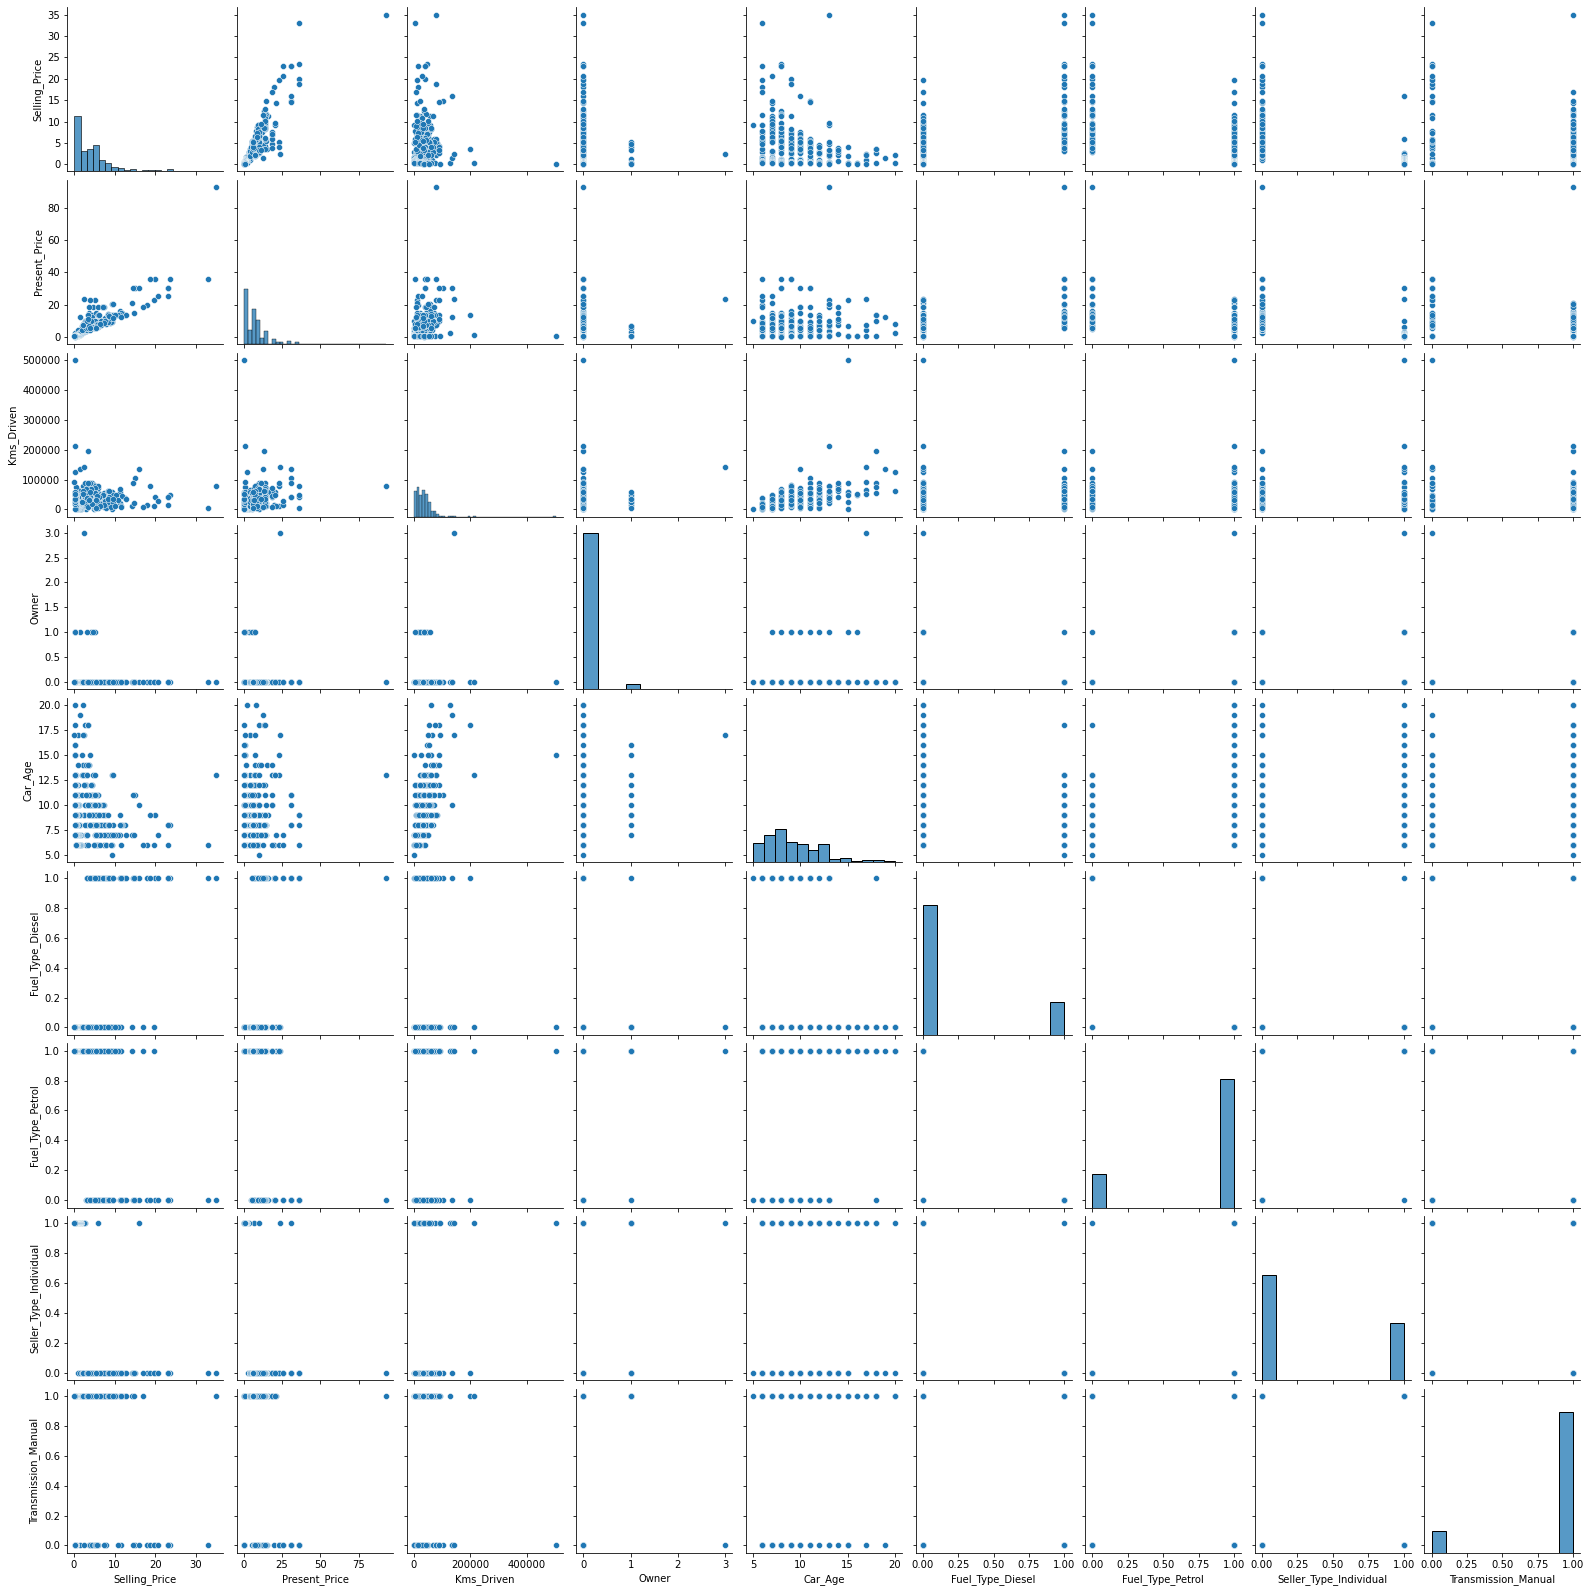

In [45]:
sns.pairplot(new_df)

### 5.2 Plot initial dataset correlation(new_df)

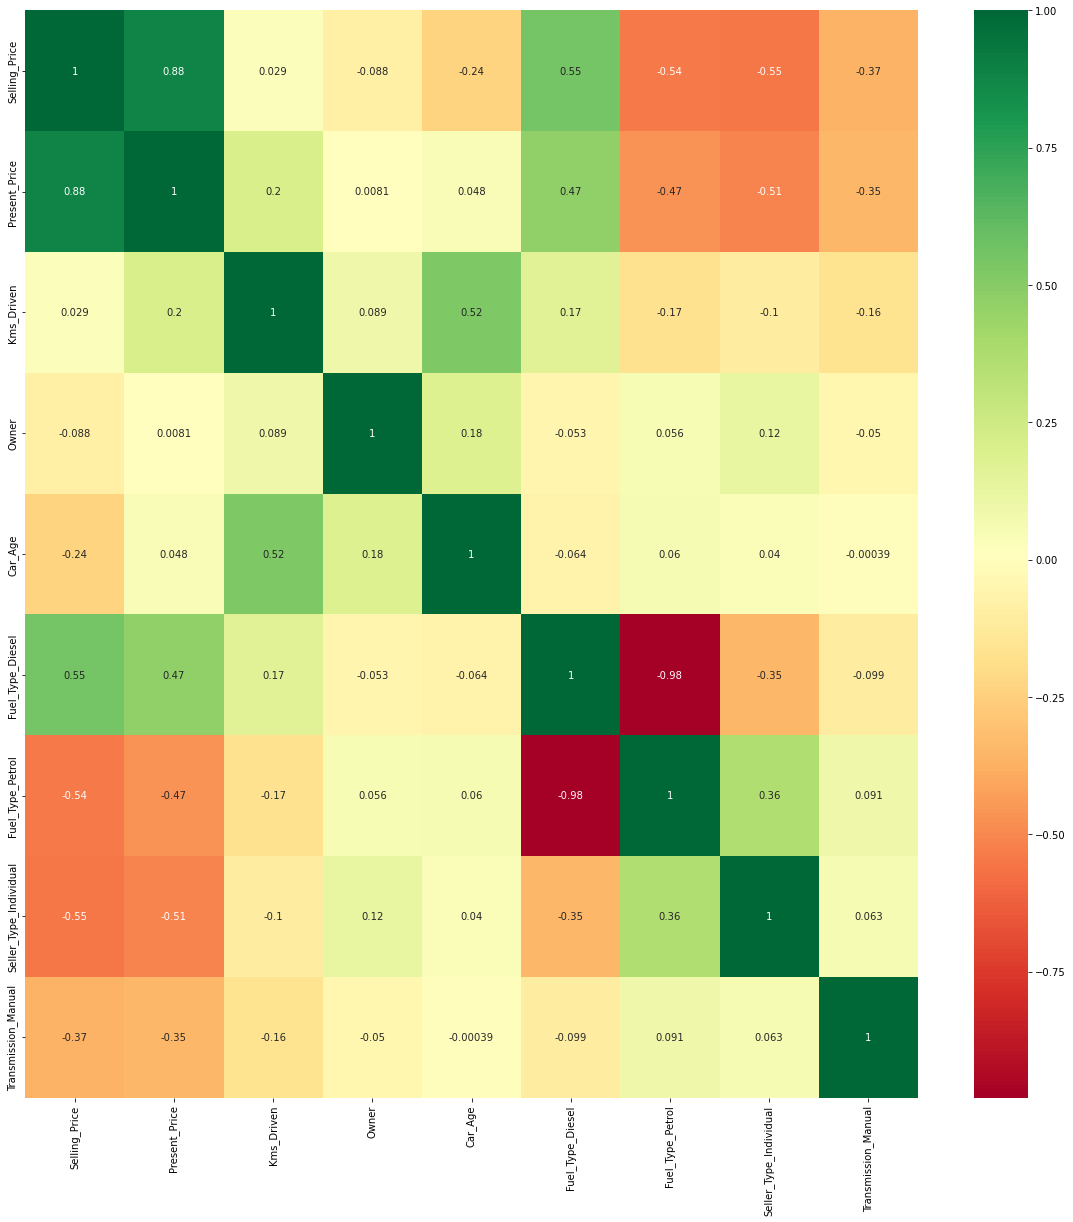

In [47]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Insight
- present_price and selling_price are highily correlated
- the green color indicate highily possitive correlated
- the red color indicate highly negative correlated